In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/train_titanic.csv'
titanic_data_set=pd.read_csv(url,error_bad_lines=False)
titanic_data_set.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(891, 12)

In [3]:
#missing data 
total = titanic_data_set.isnull().sum().sort_values(ascending=False)

In [4]:
#porcentaje de mujeres 
#percentage of women survived
women = titanic_data_set.loc[titanic_data_set.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

In [5]:
#porcentajes de hombres 
men = titanic_data_set.loc[titanic_data_set.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

In [6]:
titanic_data_set['Survived'] = titanic_data_set['Survived'].map({0:"not_survived",
1:"survived"})  #conteo de los supervivientes 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


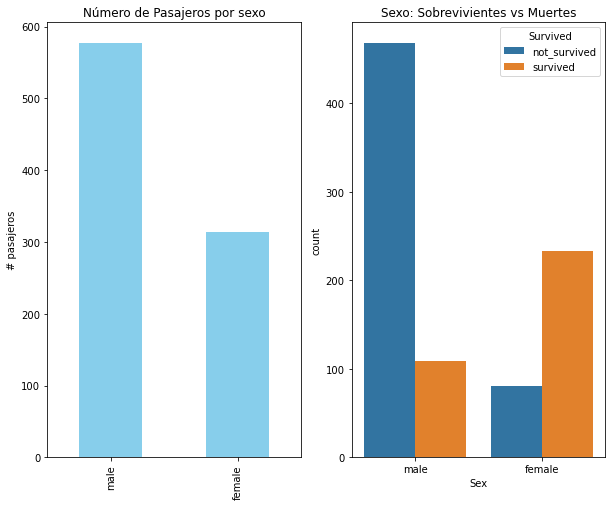

In [7]:
#Graficación 
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
titanic_data_set["Sex"].value_counts().plot.bar(color = "skyblue", ax =
ax[0])
ax[0].set_title("Número de Pasajeros por sexo")
ax[0].set_ylabel("# pasajeros")
sns.countplot("Sex", hue = "Survived", data = titanic_data_set, ax = ax[1])
ax[1].set_title("Sexo: Sobrevivientes vs Muertes")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

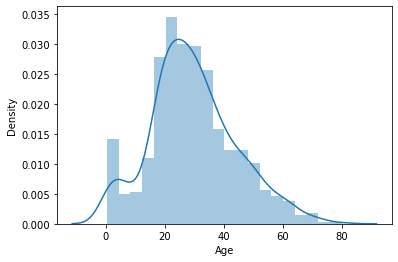

In [8]:
#distribución de la edad 
sns.distplot(titanic_data_set['Age'].dropna())

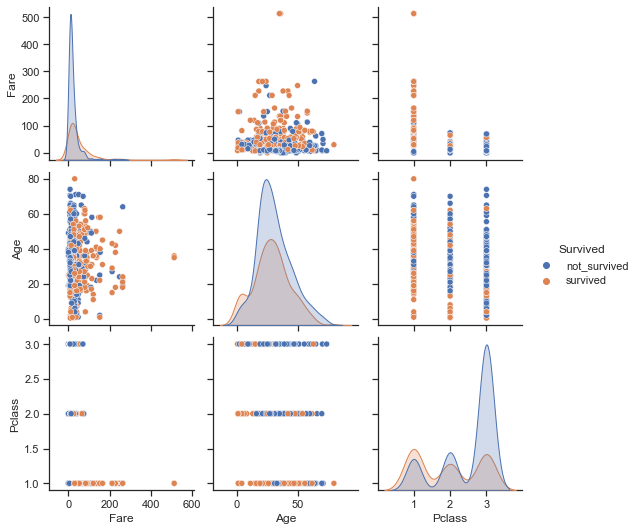

In [9]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic_data_set,vars = [ 'Fare','Age','Pclass'],
hue="Survived")
plt.show()

In [10]:
titanic_data_set['Embarked'] = titanic_data_set['Embarked'].map({"S":1,
"C":2,"Q":2,"NaN":0})
Tcorrelation = titanic_data_set.corr(method='pearson')
Tcorrelation

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.022269
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.076466
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.025431
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.069438
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.061512
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.163758
Embarked,-0.022269,-0.076466,0.025431,-0.069438,-0.061512,0.163758,1.000000


<AxesSubplot:>

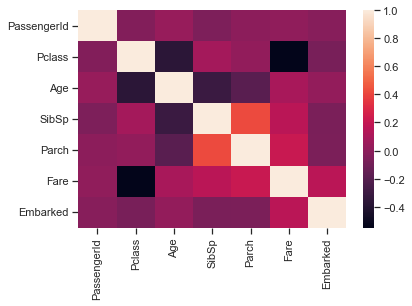

In [11]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
 yticklabels=Tcorrelation.columns)